### 최소공통조상(LCA)
- 트리에서 임의의 두 정점의 공통된 조상 중에서 가장 가까운 조상을 찾는 문제
- 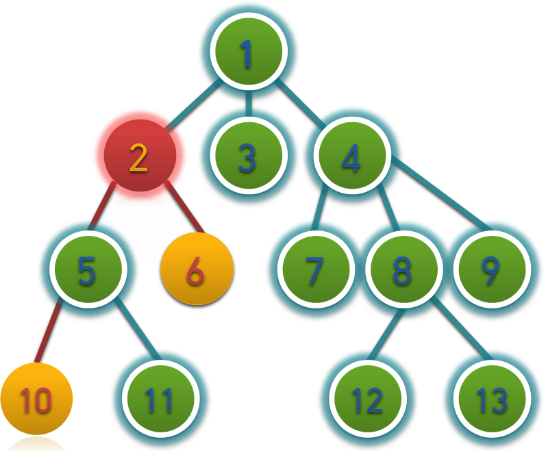
  - 위 트리에서 10과 6의 LCA는 2가 된다.
- 선형 시간내에 LCA를 찾는 알고리즘은 다음과 같다.
  - 정점 `A`에서 부모로 가는 경로 `p`를 구한다.
  - 정점 `B`에서 부모로 가는 경로를 탐색 하는 중에 `p`에 있는 정점을 만나면 그 정점이 LCA가 된다.

### Sparse Table
- 정적인 데이터의 집합(집합의 원소가 변하지 않는)에 대한 빠른 쿼리를 처리하기 위한 자료구조
  - 이때 데이터의 기록 대상을 미리 구할 수 있어야 하며, 데이터의 기록 대상이 변하지 않아야 한다.
- 특정 구간의 최소값, 최대값, GCD, LCA 등을 구하는데 사용할 수 있다.

#### 예시
- 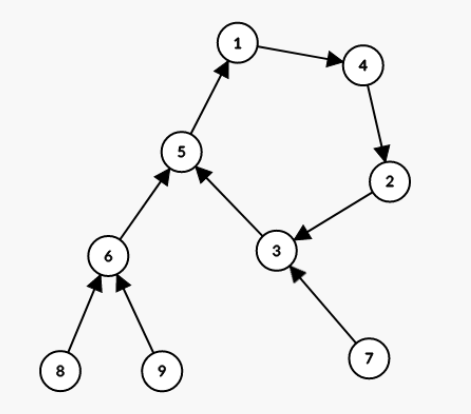
- 위 그래프에서 임의의 정점 `v`를 잡아 `k` 칸 움직이면 도착하는 정점을 구하는 문제를 생각해보자.
  - `k=1`이면 각 v에 대해서 `4 3 5 2 1 5 3 6 6`라고 표현할 수 있다.
- 모든 정점 `v`에 대해 `k=2`일 때의 정점을 구해보면 다음과 같다.
  - 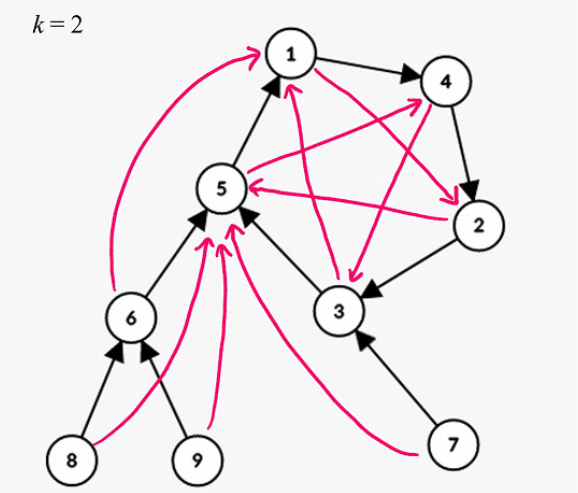
  - `2 5 1 3 4 1 5 5 5`
  - 사실 이는 `k=1`일 때의 결과를 이용해 구할 수 있다.
- 마찬가지로 `k=4`일 때의 결과도 `k=2`일 때의 결과를 이용해 구할 수 있다.
  - 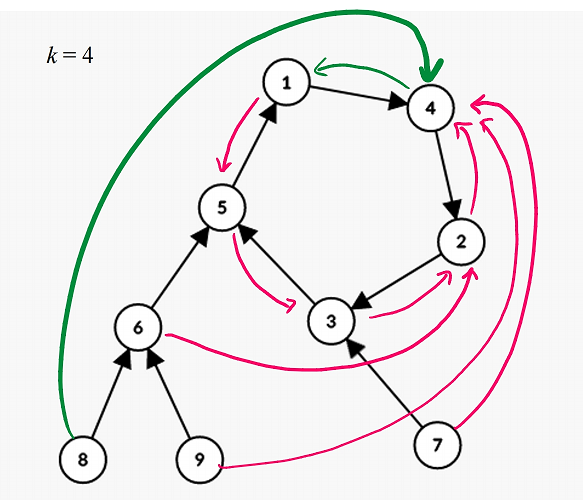
  - `5 4 2 1 3 2 4 4 4`
- 즉 $k^n$에서 $n$이 2의 거듭제곱의 꼴일 때 $k^n$은 $k^{n-1}$에서 쉽게 구할 수 있다.
- $n$이 2의 거듭제곱이 아니라면 (ex. $n=7$) 거듭제곱의 꼴로 만들어준 후에 구할 수 있다.
  - $n=7$이면 $n=4+2+1$이므로 $k^7=k^4*k^2*k^1$이다.
- 따라서 $k^n$을 구할 때 $k^{2^i}$를 구해놓으면 $k^n$을 $O(logn)$에 구할 수 있다.

In [ ]:
import sys, io, os
input=io.BytesIO(os.read(0,os.fstat(0).st_size)).readline

N = int(input())
T = [[] for _ in range(N+1)]
P = [-1] * (N+1) #부모 노드 
L = [0] * (N+1) #노드의 높이
for _ in range(N-1) :
  a, b = map(int, input().split())
  T[a].append(b)
  T[b].append(a)

def dfs(T, P, L) : #각 노드에 대해 부모 노드와 노드의 높이를 저장
  vis = [False] * (N+1)
  vis[1] = True
  Q = [1]
  l = 1
  while Q :
    nextQ = []
    while Q:
      u = Q.pop()
      for v in T[u] :
        if not vis[v] :
          vis[v] = True
          P[v] = u
          L[v] = l
          nextQ.append(v)
    Q = nextQ
    l += 1

dfs(T, P, L)
MAX = 18 #2^18 > 100000
DP = [P] + [[0] * (N+1) for _ in range(MAX)] #DP[i][j] : j의 2^i번째 부모
for i, l in enumerate(DP[1:], 1) : #O(NlogN)
  for j in range(N+1) :
    l[j] = DP[i-1][DP[i-1][j]]

for _ in range(int(input())) :
  a, b = map(int, input().split())
  
  if L[a] < L[b] : #a가 더 깊은 노드가 되도록
    a, b = b, a
  
  for i in range(MAX-1, -1, -1) : #a와 b의 높이를 맞춰준다. (logN)
    if L[a] - L[b] >= (1 << i) :
      a = DP[i][a]

  #두 정점의 높이가 같으므로 2^i와 2^(i+1) 안에 공통 조상이 존재한다. 즉, P에서 찾을 수 있게된다.
  #2^i씩 동시에 올라가면서 공통 조상을 찾는다. (logN)
  if a != b:
    for i in range(MAX-1, -1, -1) :
      if DP[i][a] != -1 and DP[i][a] != DP[i][b] :
        a = DP[i][a]
        b = DP[i][b]
    a = DP[0][a] #a와 b의 부모가 같으므로, a의 부모를 출력한다.
  sys.stdout.write(str(a) + '\n')

- 마지막의 `DP[0][a]` 부분은 LCA를 출력할 필요가 없을 경우 하지 않는다.
- (마지막 루프에서)a와 b의 공통조상을 찾는 과정에서 필요한 연산이 있을 경우, 각각의 커서를 옮기기 전(`DP[i][a]`등을 하기 전)에 진행해야 한다.